# Data Scrubbing and Cleaning for Improved Analysis with DataCleaner  

Check my Github for [this project's details](https://github.com/westrany/Data-Scrubbing-and-Cleaning-for-Improved-Analysis-with-DataCleaner/blob/main/README.md). More info on the chosen dataset has been [uploaded to Kaggle](https://www.kaggle.com/datasets/mariafitas/goodreads-small-dataset).

**Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

**Load CSV Data into DataFrame**

In [2]:
# For file in the same directory
df = pd.read_csv('unclean_goodreads_library_export.csv') 

# If the CSV file is in a different directory, specify the path
# df = pd.read_csv('/path/to/your_file.csv')

# If the CSV file is hosted online, provide the URL
# df = pd.read_csv('https://example.com/your_file.csv')

**Display First Few Rows**

In [9]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

# Set display options to show full numbers without scientific notation
# (forces the full number of ISBN13 values to appear instead of in scientific notation)
pd.set_option('display.float_format', '{:.0f}'.format)

# Display the first 10 rows of the DataFrame
print("First few rows of the DataFrame:")
display(df.iloc[:10])

First few rows of the DataFrame:


,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
0,50617439,Louvor da Terra,Byung-Chul Han,"Han, Byung-Chul",Miguel Serras Pereira,9896419884,9789900000000,0,4,Relógio D'Água Editores,Paperback,152,2020,2005,NaN,30/01/2024,to-read,to-read (#179),to-read,NaN,NaN,NaN,0,0
1,50617439,Louvor da Terra,Byung-Chul Han,"Han, Byung-Chul",Miguel Serras Pereira,9896419884,9789900000000,0,4,Relógio D'Água Editores,Paperback,152,2020,2005,NaN,30/01/2024,to-read,to-read (#179),to-read,NaN,NaN,NaN,0,0
2,11838916,Cat Stories (Everyman's Library Pocket Classic...,Diana Secker Tesdell,"Tesdell, Diana Secker",NaN,307700895,9780310000000,0,4,Everyman's Library,Hardcover,400,2011,2011,NaN,29/01/2024,"cats, fiction, short-stories, currently-reading","cats (#5), fiction (#35), short-stories (#2), ...",currently-reading,NaN,NaN,NaN,1,0
3,37844623,"The Blood (Jem Flockhart, #3)",E.S. Thomson,"Thomson, E.S.",NaN,1472126572,9781470000000,5,4,Constable,Hardcover,375,2018,2018,28/01/2024,18/01/2024,"historical-fiction, mystery","historical-fiction (#5), mystery (#7)",read,NaN,NaN,NaN,1,0
4,124798505,Four Seasons in Japan,Nick Bradley,"Bradley, Nick",NaN,085752934X,9780860000000,0,4,Doubleday,Hardcover,336,2023,2023,NaN,08/12/2023,to-read,to-read (#178),to-read,NaN,NaN,NaN,0,0
5,124798505,Four Seasons in Japan,Nick Bradley,"Bradley, Nick",NaN,085752934X,9780860000000,0,4,Doubleday,Hardcover,336,2023,2023,NaN,08/12/2023,to-read,to-read (#178),to-read,NaN,NaN,NaN,0,0
6,1464992,"""Reader's Digest"" Farmhouse Cookery: Recipes f...",Reader's Digest,"Digest, Reader's",NaN,276002105,9780280000000,5,5,Reader's Digest Association,Hardcover,400,1980,1980,NaN,05/12/2023,"non-fiction, cookbook","non-fiction (#17), cookbook (#1)",read,NaN,NaN,NaN,1,0
7,40539188,The Elder Scrolls: The Official Cookbook,Chelsea Monroe-Cassel,"Monroe-Cassel, Chelsea",NaN,1683833988,9781680000000,4,5,Insight Editions,Hardcover,192,2019,2019,NaN,05/12/2023,"cookbook, non-fiction","cookbook (#2), non-fiction (#18)",read,NaN,NaN,NaN,0,0
8,13436287,Korea: The Impossible Country,Daniel Tudor,"Tudor, Daniel",NaN,804842523,9780800000000,0,4,Tuttle Publishing,Hardcover,312,2012,2012,NaN,22/11/2023,to-read,to-read (#177),to-read,NaN,NaN,NaN,0,0
9,202341478,Poetry Scraps,Rowan Skye,"Skye, Rowan",NaN,1728376033,9781730000000,0,0,AuthorHouse,Hardcover,116,2023,NaN,02/11/2023,12/11/2023,poetry,poetry (#13),read,NaN,NaN,NaN,1,0


**Display the structure of the dataset (columns, data types, dataframe size)**

In [4]:
print("Columns and Data Types:")
print(df.dtypes)

print("\nSize of the DataFrame:")
print(df.shape)

Columns and Data Types:
Book Id                         int64
Title                          object
Author                         object
Author l-f                     object
Additional Authors             object
ISBN                           object
ISBN13                        float64
My Rating                       int64
Average Rating                float64
Publisher                      object
Binding                        object
Number of Pages               float64
Year Published                float64
Original Publication Year     float64
Date Read                      object
Date Added                     object
Bookshelves                    object
Bookshelves with positions     object
Exclusive Shelf                object
My Review                      object
Spoiler                        object
Private Notes                  object
Read Count                      int64
Owned Copies                    int64
dtype: object

Size of the DataFrame:
(406, 24)


**Change data types to match expectations**  

Date columns "Date Read" and "Date Added" should be in the DD/MM/YYYY formats.  

The column "Spoiler" refers to the existence of Spoilers in the "My Review" data. Currently the column marks TRUE when there is a value, and leaves it blank when there are no spoilers. To better analyse this, I'm changing the TRUE values to 1, and the empty cells to 0. 

In [12]:
# Convert Data Read and Data Added columns to DD/MM/YYYY
df[['Date Read', 'Date Added']] = df[['Date Read', 'Date Added']].apply(pd.to_datetime, format='%d/%m/%Y')

# Fill missing values with 0
df['Spoiler'] = df['Spoiler'].fillna(0)

# Replace 'TRUE' values with 1
df.loc[df['Spoiler'] == 'TRUE', 'Spoiler'] = 1

# Convert the column to numeric type for better boolean analysis
df['Spoiler'] = pd.to_numeric(df['Spoiler'])

# Verify the changes
print(df['Spoiler'].value_counts())  # Check the distribution of values

0    403
1      3
Name: Spoiler, dtype: int64


**Check for missing data**

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Book Id                         0
Title                           0
Author                          0
Author l-f                      0
Additional Authors            292
ISBN                           89
ISBN13                         82
My Rating                       0
Average Rating                  0
Publisher                      12
Binding                         6
Number of Pages                11
Year Published                  7
Original Publication Year      36
Date Read                     279
Date Added                      0
Bookshelves                    11
Bookshelves with positions     11
Exclusive Shelf                 0
My Review                     389
Spoiler                       403
Private Notes                 389
Read Count                      0
Owned Copies                    0
dtype: int64


**Visualise missing values**

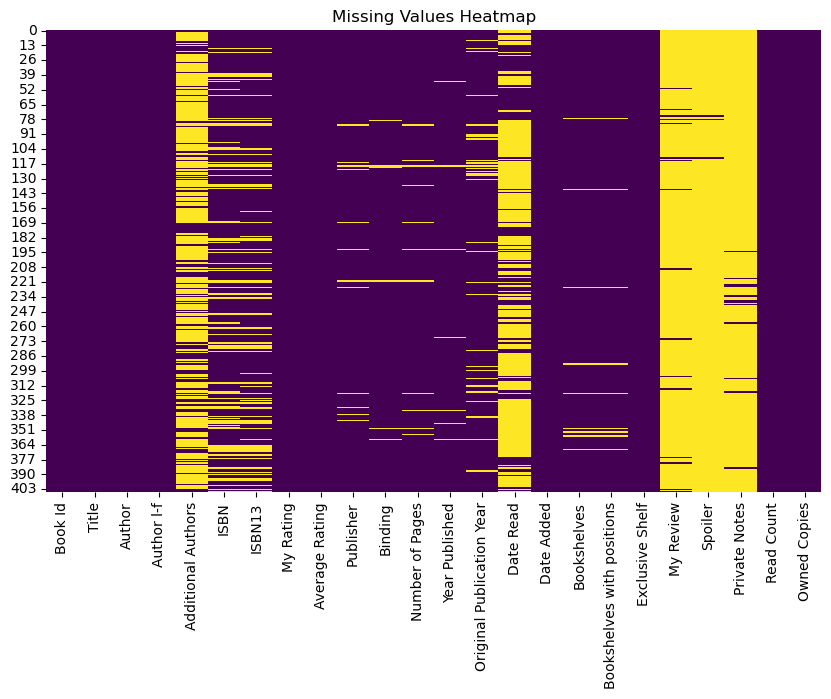

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

**Check for duplicate entries**

In [7]:
duplicate_entries = df.duplicated().sum()
print("Duplicate Entries:", duplicate_entries)

Duplicate Entries: 20


**Check for unique values**

In [10]:
for col in categorical_cols:
    print(col, df[col].unique())

NameError: name 'categorical_cols' is not defined

**Check for outliers (assuming numeric columns)**

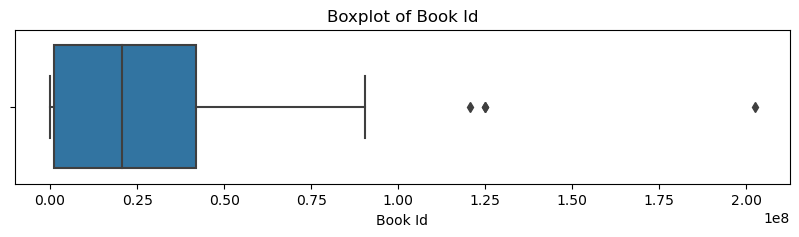

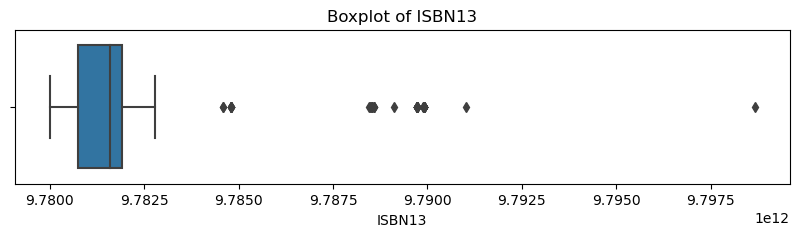

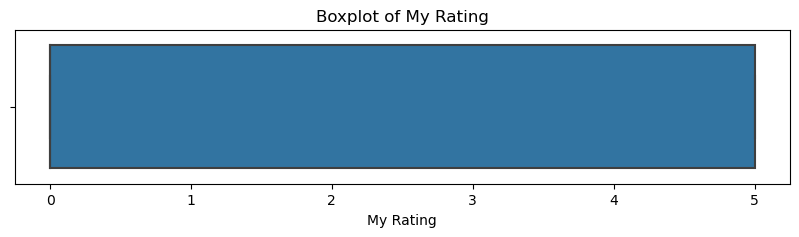

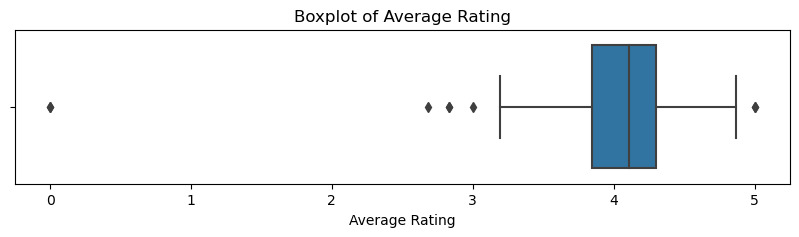

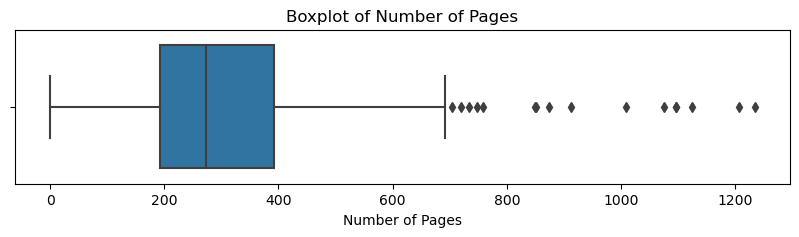

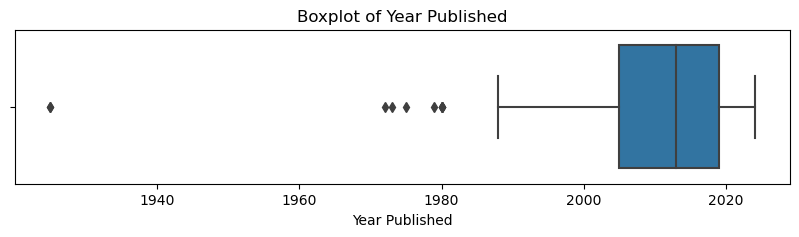

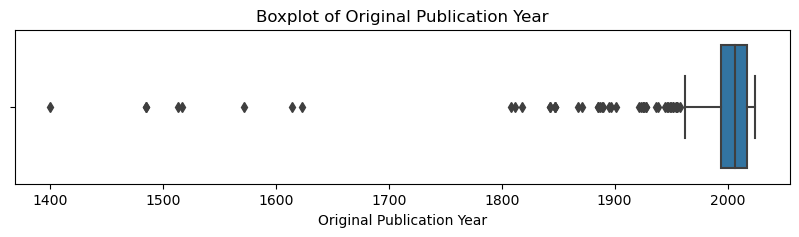

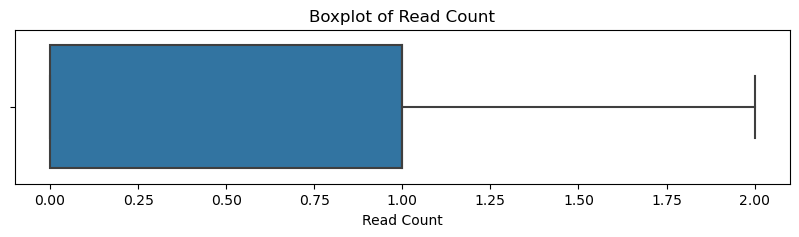

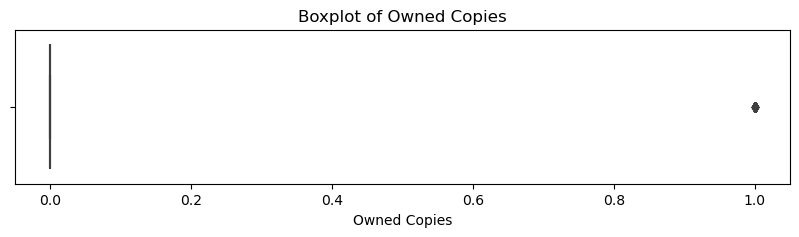

In [8]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()